***crop yeild dataset***

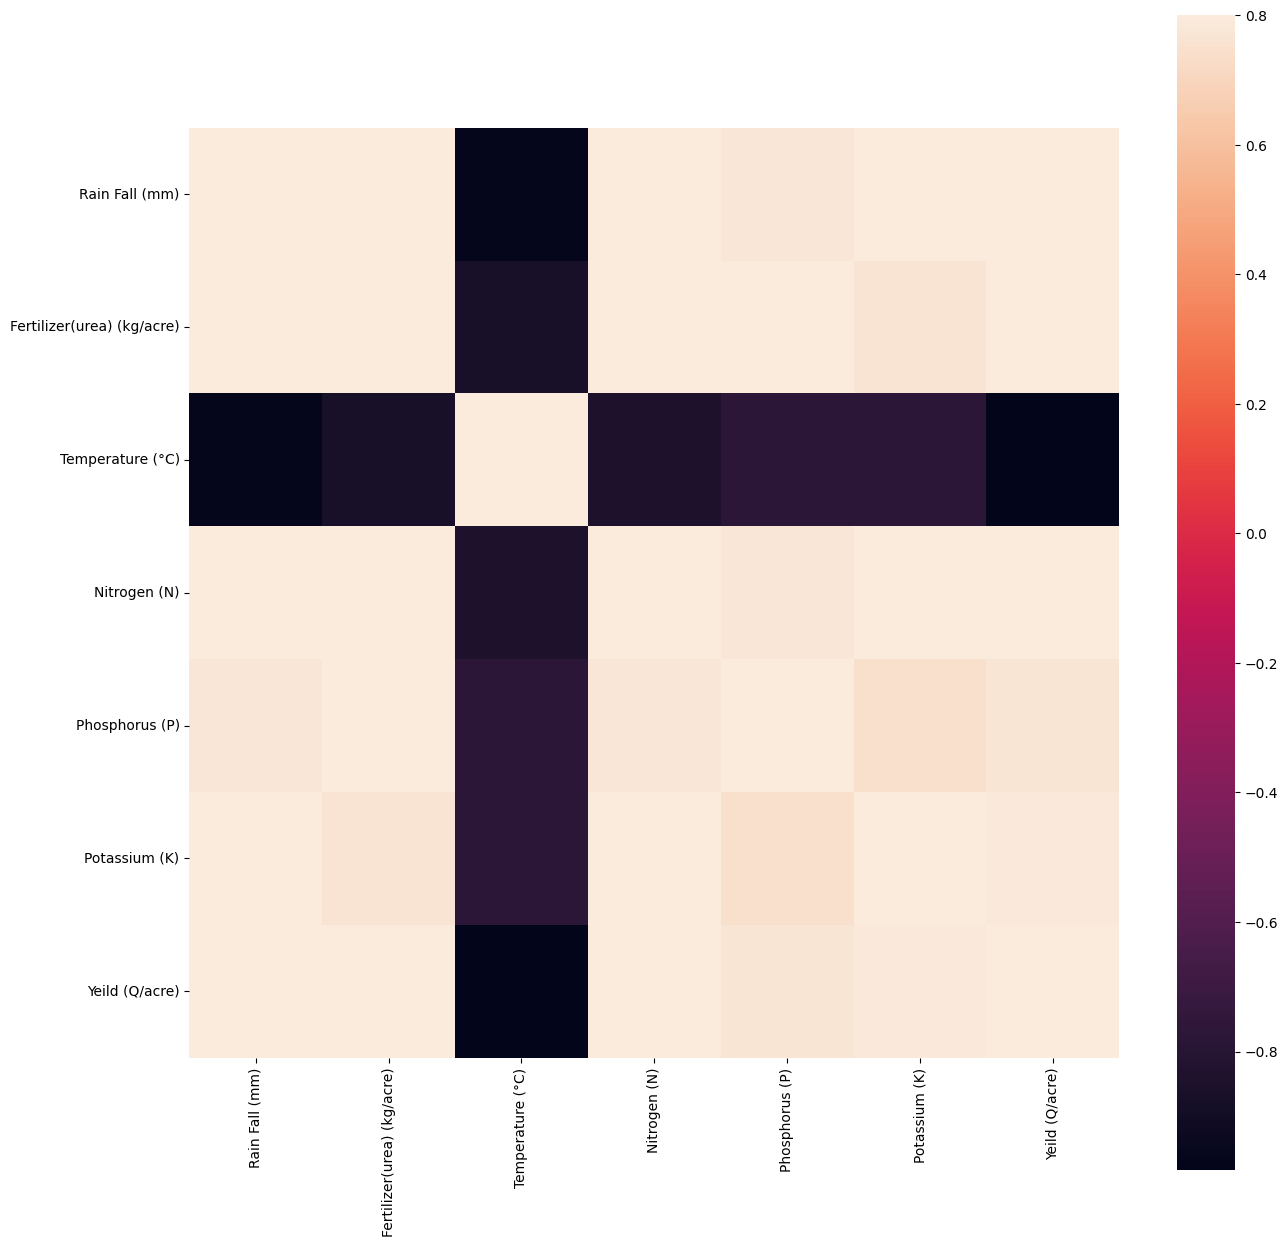

MSE = 0.7040859869924799
RMSE = 0.8390983178343763
R2score = 0.9974542386654359


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
df = pd.read_csv("/content/CROPYELID.csv")
df['Yeild (Q/acre)'] = df['Rain Fall (mm)'] / df['Temperature (°C)']
df = df.fillna(df.mean())

# Correlation matrix
C_mat = df.corr()
fig = plt.figure(figsize=(15, 15))
sb.heatmap(C_mat, vmax=.8, square=True)
plt.show()

# Features and scaling
features_list = ['Rain Fall (mm)', 'Fertilizer(urea) (kg/acre)', 'Temperature (°C)',
                 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']
p = df[features_list]
q = df['Yeild (Q/acre)']

# Train-test split
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.31, random_state=43)

# Scaling
sc = StandardScaler()
p_train = sc.fit_transform(p_train)
p_test = sc.transform(p_test)

# Model fitting and prediction
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(p_train, q_train)
q_pred = regr.predict(p_test)

# Evaluation metrics
print('MSE =', mse(q_pred, q_test))
print('RMSE =', np.sqrt(mse(q_pred, q_test)))
print('R2score =', r2_score(q_test, q_pred))
